In [1]:
import pandas as pd
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("crypto-query-tweets.csv")
df.head()

,tweet_text
0,49That spaces was so bad for #crypto. Save the...
1,whitelist Detailed @MorghadeG @atowerises @cry...
2,som #cyptocurrency #btc #eth #crypto W Leone n...
3,@renezive @Crypto_Inside_ @NftMeta_News Done
4,@el_crypto_prof They aren’t the same pattern…s...


In [3]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
    return text


# Clean the tweets
df['tweet_text'] = df['tweet_text'].apply(cleanTxt)

# Show the cleaned tweets
df.head()

,tweet_text
0,49That spaces was so bad for crypto. Save the ...
1,whitelist Detailed _davy_en _oba 6_mr 69 102...
2,som cyptocurrency btc eth crypto W Leone new a...
3,_Inside_ _News Done
4,_crypto_prof They aren’t the same pattern…simi...


In [4]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['tweet_text'].apply(getSubjectivity)
df['Polarity'] = df['tweet_text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df.head()

,tweet_text,Subjectivity,Polarity
0,49That spaces was so bad for crypto. Save the ...,0.483333,0.150000
1,whitelist Detailed _davy_en _oba 6_mr 69 102...,0.750000,0.400000
2,som cyptocurrency btc eth crypto W Leone new a...,0.454545,0.136364
3,_Inside_ _News Done,0.000000,0.000000
4,_crypto_prof They aren’t the same pattern…simi...,0.125000,0.000000


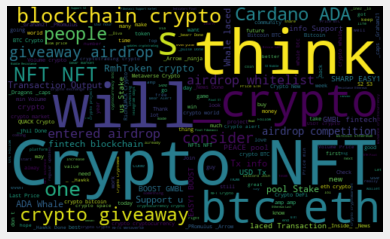

In [5]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['tweet_text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [7]:
# Create a function to compute negative (-1), 
# neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,tweet_text,Subjectivity,Polarity,Analysis
0,49That spaces was so bad for crypto. Save the ...,0.483333,0.150000,Positive
1,whitelist Detailed _davy_en _oba 6_mr 69 102...,0.750000,0.400000,Positive
2,som cyptocurrency btc eth crypto W Leone new a...,0.454545,0.136364,Positive
3,_Inside_ _News Done,0.000000,0.000000,Neutral
4,_crypto_prof They aren’t the same pattern…simi...,0.125000,0.000000,Neutral
...,...,...,...,...
79995,"Bitcoin appeared stuck around $20,000 on Sunda...",0.000000,0.000000,Neutral
79996,_inez _io Tg:slamet,0.000000,0.000000,Neutral
79997,_inez Hello... Goodnight miss inez,0.000000,0.000000,Neutral
79998,_ _Hawkk Done🔔,0.000000,0.000000,Neutral


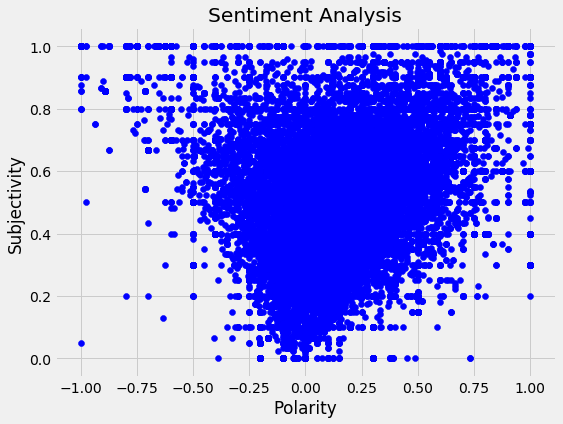

In [7]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [8]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweet_text']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

38.1

In [9]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweet_text']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

11.8

In [10]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     40077
Positive    30496
Negative     9427
Name: Analysis, dtype: int64

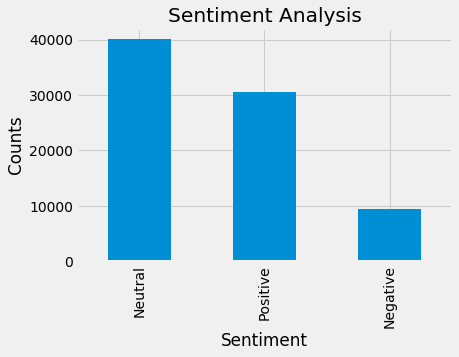

In [11]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()